# Credit Card Approval - Try 2

**Project Flow:**

1. Importing and understanding data
2. Categorizing data (Converting string categories to numeric)
3. Removing Null Values if any
4. Defining Hypothesis
5. Using Hypothesis for calculating Cost Function
6. Defining function for optimizing Theta (will be using scipy.optimize)
7. Checking Hypothesis on x_test
8. Calculating f1 and Accuracy score on y_test and y_test_predicted

*My target will be getting 90 % accuracy*

In [1]:
#importing Module
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv') #reading csv

In [3]:
print(data.shape)
data.head()

(690, 16)


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus.
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    object 
 1   Age              690 non-null    object 
 2   Debt             690 non-null    float64
 3   Married          690 non-null    object 
 4   BankCustomer     690 non-null    object 
 5   EducationLevel   690 non-null    object 
 6   Ethnicity        690 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          690 non-null    object 
 14  Income           690 non-null    int64  
 15  ApprovalStatus.  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


- 'ZipCode' is of no use for predicting approval.
- So we will be droping 'ZipCode' from Data


In [5]:
data = data.drop(columns=['ZipCode']) 

*When we checked info 'Age' was in object format so we will convert this 'Age' to numeric*

In [6]:
data['Age'] = pd.to_numeric(data['Age'],errors='coerce')

In [7]:
data = data.replace('?','') # data has '?' which is null value

**Now we will Check unique value counts for each column and then we will replace the string values with 0/1**

for multi-class columns we will be using 0,1,2,3,...

In [8]:
data = data.replace({'ApprovalStatus.':{'-':0,'+':1}}) 

In [9]:
data.Citizen.unique()

array(['g', 's', 'p'], dtype=object)

In [10]:
data = data.replace({'Citizen':{'g':0,'s':1,'p':2}})

In [11]:
data.DriversLicense.unique()

array(['f', 't'], dtype=object)

In [12]:
data = data.replace({'DriversLicense':{'f':0,'t':1}})

In [13]:
data.DriversLicense.value_counts()

0    374
1    316
Name: DriversLicense, dtype: int64

In [14]:
data.Employed.value_counts()

f    395
t    295
Name: Employed, dtype: int64

In [15]:
data = data.replace({'Employed':{'f':0,'t':1}})

In [16]:
data.PriorDefault.value_counts()

t    361
f    329
Name: PriorDefault, dtype: int64

In [17]:
data = data.replace({'PriorDefault':{'t':0,'f':1}})

In [18]:
data.Married.value_counts()

u    519
y    163
       6
l      2
Name: Married, dtype: int64

In [19]:
data = data.replace({'Married':{'u':0,'y':1,'':2,'l':3}})

In [20]:
data = data.replace({'Gender':{'b':0,'a':1,'':2}})

In [21]:
data = data.replace({'BankCustomer':{'g':0,'p':1,'':2,'gg':3}})

In [22]:
data = data.replace({'EducationLevel':{'c':0,'q':1,'w':2,'i':3,'aa':4,'ff':5,'k':6,'cc':7,'m':8,'x':9,'d':10,'e':11,'j':12,'':13,'r':14}})

In [23]:
data = data.replace({'Ethnicity':{'v':0,'h':1,'bb':2,'ff':3,'':4,'j':5,'z':6,'dd':7,'n':8,'o':9}})

Now we will be having all our columns in int or float form

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    int64  
 1   Age              678 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          690 non-null    int64  
 4   BankCustomer     690 non-null    int64  
 5   EducationLevel   690 non-null    int64  
 6   Ethnicity        690 non-null    int64  
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    int64  
 9   Employed         690 non-null    int64  
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    int64  
 12  Citizen          690 non-null    int64  
 13  Income           690 non-null    int64  
 14  ApprovalStatus.  690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


**Now we will be droping null values**

In [25]:
data=data.dropna(subset=['Age','Gender','Married','BankCustomer','EducationLevel','Ethnicity'])

In [26]:
data.isna().sum()

Gender             0
Age                0
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
Income             0
ApprovalStatus.    0
dtype: int64

## Building Models

In [27]:
data.shape

(678, 15)

In [28]:
x = data.drop(['ApprovalStatus.'], axis = 1)
y = data['ApprovalStatus.']
x

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
0,0,30.83,0.000,0,0,2,0,1.25,0,1,1,0,0,0
1,1,58.67,4.460,0,0,1,1,3.04,0,1,6,0,0,560
2,1,24.50,0.500,0,0,1,1,1.50,0,0,0,0,0,824
3,0,27.83,1.540,0,0,2,0,3.75,0,1,5,1,0,3
4,0,20.17,5.625,0,0,2,0,1.71,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,21.08,10.085,1,1,11,1,1.25,1,0,0,0,0,0
686,1,22.67,0.750,0,0,0,0,2.00,1,1,2,1,0,394
687,1,25.25,13.500,1,1,5,3,2.00,1,1,1,1,0,1
688,0,17.92,0.205,0,0,4,0,0.04,1,0,0,0,0,750


In [29]:
m = data.shape[0]

m #m is number of data points

678

In [30]:
data.insert(0,'x0',1) # adding feature x0

In [31]:
print(data.shape)
data.head(2)


(678, 16)


,x0,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus.
0,1,0,30.83,0.00,0,0,2,0,1.25,0,1,1,0,0,0,1
1,1,1,58.67,4.46,0,0,1,1,3.04,0,1,6,0,0,560,1


In [32]:
x.shape

(678, 14)

In [33]:
from scipy.special import expit #Vectorized sigmoid function

In [34]:
#defining hypothesis

def hypothesis(mytheta,myx):
    return expit(np.dot(myx,mytheta))

In [35]:
#defining function that will compute cost
def costCompute(mytheta,myx,myy,mylambda=0.):
    term1 = np.dot(-np.array(y).T,np.log(hypothesis(mytheta,myx)))
    term2 = np.dot(1-np.array(y).T,np.log(1-hypothesis(mytheta,myx)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [36]:
initial_theta = np.zeros((x.shape[1],1)) #declaring initial_theta with all values as Zero
initial_theta.shape

(14, 1)

In [37]:
round(costCompute(initial_theta,x,y,mylambda=0.),3) #this will be our cost value for initial_theta

0.693

### As we have initialized our theta as ZERO randomly we got cost value as 0.693 which is quite high now we will optimize this theta to minimize this cost value

**We are going to find theta for which Cost value is minimum**

**Now we will be repeating the optimiziation function for 10 times and will be using final theta**

In [54]:
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(costCompute, x0=mytheta, args=(myX, myy, mylambda), maxiter=4000, full_output=True)
    return result[0], result[1]

In [39]:
theta_history = []
cost_value = []
theta = initial_theta
for i in range(0,10):
    theta, mincost = optimizeTheta(theta,x,y)
    theta_history.append(theta)
    cost_value.append(mincost)
    

<ipython-input-35-2cb765da4371>:4: RuntimeWarning: divide by zero encountered in log
  term2 = np.dot(1-np.array(y).T,np.log(1-hypothesis(mytheta,myx)))


Optimization terminated successfully.
         Current function value: 0.481800
         Iterations: 3103
         Function evaluations: 4262
Optimization terminated successfully.
         Current function value: 0.346947
         Iterations: 3440
         Function evaluations: 4586
Optimization terminated successfully.
         Current function value: 0.330893
         Iterations: 20
         Function evaluations: 319
Optimization terminated successfully.
         Current function value: 0.330888
         Iterations: 23
         Function evaluations: 187
Optimization terminated successfully.
         Current function value: 0.330887
         Iterations: 13
         Function evaluations: 207
Optimization terminated successfully.
         Current function value: 0.330886
         Iterations: 51
         Function evaluations: 233
Optimization terminated successfully.
         Current function value: 0.330886
         Iterations: 13
         Function evaluations: 207
Optimization terminat

Below is the value of Theta_0 to Theta_14 after each implementation of Optimization

In [40]:
theta_history

[array([ 6.77564838e-01, -3.57655462e-02,  1.47304075e-02,  9.02971248e-01,
        -1.24307382e+00, -1.72647749e-02,  1.33894329e-01,  2.67302770e-01,
        -5.32452069e-01, -3.13407815e-01,  3.34450742e-01, -6.13698147e-01,
         5.66429234e-01,  3.48896243e-04]),
 array([ 3.96484891e-01,  4.47779972e-03,  3.56619801e-02, -9.85434972e-01,
         1.09335608e+00, -1.01289058e-01,  1.05201729e-01,  1.16693593e-01,
        -3.32239543e+00,  2.37656002e-01,  1.89458072e-01, -2.56126803e-01,
         1.25832703e+00,  3.61716100e-04]),
 array([ 2.72858253e-01, -7.64848803e-03,  1.81537676e-03, -2.13282779e+00,
         2.10587077e+00,  4.69998377e-02, -2.50401333e-03,  1.17455916e-01,
        -3.39925678e+00,  7.14378376e-01,  1.29694641e-01, -1.89621369e-01,
         9.85073485e-01,  3.83178196e-04]),
 array([ 2.72858253e-01, -7.64848803e-03,  1.81537676e-03, -2.13282779e+00,
         2.10587077e+00,  4.69998377e-02, -2.50401333e-03,  1.17455916e-01,
        -3.39925678e+00,  7.5008

**Below is how the value of cost function decreasing after each implementation of Optimization function**

In [41]:
cost_value

[0.48179990000182127,
 0.3469466331124297,
 0.33094060473119385,
 0.3308931672469031,
 0.33088798314473067,
 0.33088722533070597,
 0.330886402536164,
 0.3308859361968748,
 0.33088547356704184,
 0.33088489121547027]

Text(0, 0.5, 'Cost Value')

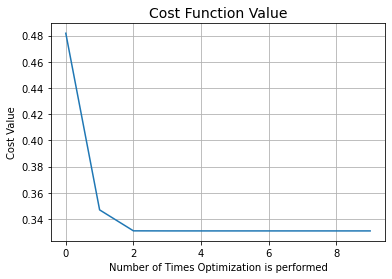

In [42]:
import matplotlib.pyplot as plt
plt.plot(cost_value)
plt.grid(True)
plt.title('Cost Function Value', fontsize = 14)
plt.xlabel('Number of Times Optimization is performed')
plt.ylabel('Cost Value')

**Now to check our calculations we will check our Hypothesis on Test and Train Data**

First we will divide our data into train and test data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 20, random_state = 100)

In [45]:
x_test = np.array(x_test)
y_test = np.array(y_test)
y_train.shape

(658,)

**Implementing Hypothesis on TEST data**

In [64]:
lst = []
for i in range(0,20):
    lst.append(round(hypothesis(theta,x_test[i])))

y_test_predicted = np.array(lst)
y_test_predicted

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

**Implementing Hypothesis on TRAIN data**

In [47]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [61]:
lst1 = []
for i in range(0,658):
    lst1.append(round(hypothesis(theta,x_train[i])))

y_train_predicted = np.array(lst1)

In [63]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

**Checking performance on y_test and y_test_Predicted**

In [65]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_test, y_test_predicted)
print(confusion_matrix)

[[ 8  1]
 [ 1 10]]


In [67]:
print('F1 Score : ' + str(f1_score(y_test,y_test_predicted)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_test_predicted)*100) +' %')

F1 Score : 0.9090909090909091
Accuracy Score : 90.0 %


**Checking performance on y_train and y_train_predicted**

In [68]:
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       364
           1       0.82      0.88      0.85       294

    accuracy                           0.86       658
   macro avg       0.86      0.86      0.86       658
weighted avg       0.87      0.86      0.86       658



In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_train, y_train_predicted)
print(confusion_matrix)

[[309  55]
 [ 35 259]]


In [76]:
print('F1 Score : ' + str(f1_score(y_train,y_train_predicted)))
print('Accuracy Score : ' + str(round(accuracy_score(y_train,y_train_predicted)*100)) +' %')

F1 Score : 0.8519736842105262
Accuracy Score : 86 %


**We Built Model with 90 % Accuracy on test data and 86 % on train data 🙂**